# National Insurance

In [1]:
#Import Packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

In [32]:
#Open the data file
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df = pd.read_csv("national.csv")
df

,ID,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,tanimp,relimp,resimp,asrimp,empimp,oq,rec,use,prob,resolve,sex,mstat,age,inc,ed,reliavrg,empavrg,tangavrg,respavrg,assuravg
0,1,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,10.0,30.0,40.0,10.0,10.0,10.0,Yes,5 or more years,No,NaN,Female,Married,25-44,$30K-$49.9K,High School or Less,7.000000,7.000000,7.000000,7.000000,7.000000
1,2,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Disagree,Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Agree Slightly,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,NaN,NaN,NaN,NaN,NaN,1.0,No,2 to 5 years,Yes,No,NaN,NaN,NaN,NaN,NaN,1.000000,1.400000,2.000000,1.000000,1.000000
2,3,Strongly Agree,Strongly Agree,Neither Agree Nor Disagree,Strongly Agree,Agree Slightly,Agree,Agree,Agree,Strongly Agree,Agree,Agree,Agree,Agree,Agree Slightly,Agree,Agree,Strongly Agree,Agree,Agree,Strongly Agree,Strongly Agree,Agree,NaN,NaN,NaN,NaN,NaN,10.0,Yes,5 or more years,No,NaN,Male,Married,25-44,$30K-$49.9K,Graduate School,6.000000,6.200000,5.750000,6.250000,6.500000
3,4,Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,5.0,35.0,20.0,20.0,20.0,10.0,Yes,Less than 1 year,No,NaN,Male,Married,25-44,$30K-$49.9K,Some College,6.600000,6.800000,6.500000,7.000000,7.000000
4,5,Agree,Agree,Agree,Agree,Strongly Agree,Strongly Agree,Agree Slightly,Agree Slightly,Agree,Agree,Agree,Neither Agree Nor Disagree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,10.0,20.0,40.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.200000,5.800000,5.000000,NaN,NaN
5,6,Neither Agree Nor Disagree,Agree Slightly,Neither Agree Nor Disagree,Strongly Agree,Agree,Agree,Agree,Neither Agree Nor Disagree,Neither Agree Nor Disagree,Disagree Slightly,Agree,Agree,Strongly Agree,Agree,Neither Agree Nor Disagree,Neither Agree Nor Disagree,Agree,Neither Agree Nor Disagree,Neither Agree Nor Disagree,Neither Agree Nor Disagree,Strongly Agree,Neither Agree Nor Disagree,5.0,15.0,10.0,50.0,20.0,5.0,Yes,5 or more years,Yes,Yes,Female,Married,25-44,$30K-$49.9K,Some College,5.200000,4.600000,6.250000,4.500000,4.750000
6,7,Agree,Strongly Agree,Agree,Agree,Agree,Strongly Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree Slightly,Agree,Agree,Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,20.0,20.0,20.0,20.0,20.0,9.0,Yes,5 or more years,No,NaN,Female,Married,25-44,$20K - $29.9 K,High School or Less,6.200000,6.200000,5.750000,6.000000,6.750000
7,8,Strongly Agree,Strongly Agree,Neither Agree Nor Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Neither Agree Nor Disagree,Strongly Agree,Disagree Slightly,Strongly Agree,Neither Agree Nor Disagree,Neither Agree Nor Disagree,Strongly Agree,Strongly Agree,Neither Agree Nor Disagree,Agree Slightly,Strongly Agree,Agree,Agree,Agree,Strongly Agree,Strongly Agree,10.0,30.0,30.0,15.0,15.0,9.0,Yes,5 or more years,Yes,No,Male,Married,25-44,$50K-$64.9,Some College,6.400000,5.600000,5.500000,5.500000,6.500000
8,9,Neither Agree Nor Disagree,Neither Agree Nor Disagree,Neither Agree Nor Disagree,Neither Agree Nor Disagree,Neither Agree Nor Disagree,Neither Agree Nor Disagree,Agree,Agree Slightly,Neither Agree Nor Disagree,Disagree Slightly,NaN,NaN,NaN,Agree Slightly,Neither Agree Nor Disagree,Agree Slightly,Agree Slightly,Neith

## 1. Examine the dataset to check for any problems and comment on any problems you encounter.

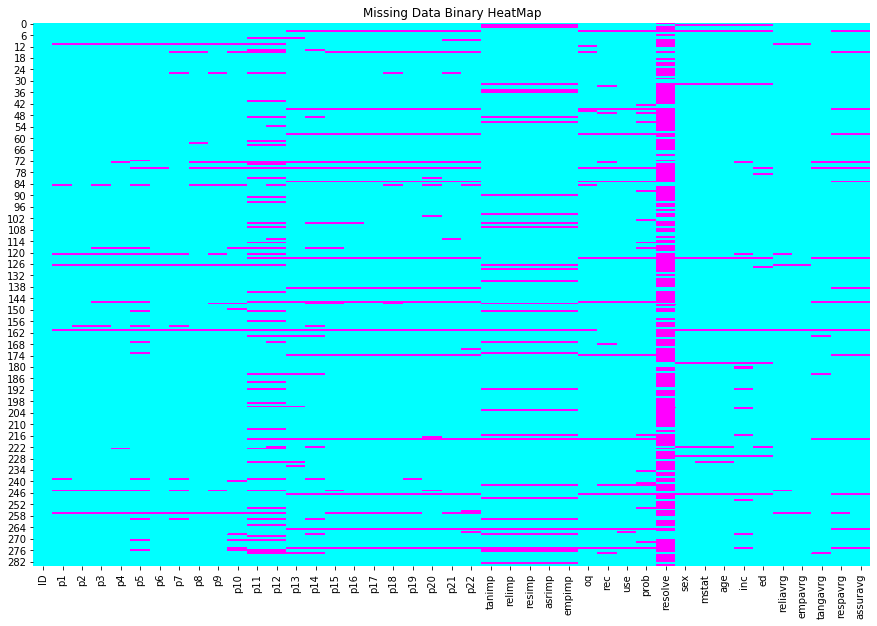

In [3]:
# Make a heatmap to show where the data is missing
plt.figure(figsize = (15,10))
missing_data = sns.heatmap(df.isnull(), cmap = "cool", cbar = False, xticklabels = True)
missing_data.set_title("Missing Data Binary HeatMap")
plt.show()

On first glance, it appears that "Resolve" and the self-reported importance scores are the factors with the highest proportions of missing data. This makes sense because Resolve having a non-null value is conditional on the customer previously opening a claim with National. For the self-reported importance scores, the customers omitted a response if and only if they chose to omit a response for all the importance scores.<br><br>
Missing data can follow these patterns: <br><br>
**Missing completely at random (MCAR):**<br>
The missing data has no correlation to the its value, nor does it have any correlation to the values of other variables for the same observation.<br><br>
**Mising at random (MAR):**<br>
The missing data has no correlation to its own value, but it does have a relationship to the reported values of other variables for the same observation. For example, perhaps men are more likely than women to omit reporting their weight, but values of the missing weights follow the same distribution as the population.<br><br>
**Missing not at random (MNAR):**<br>
The missing data is not random.<br><br>
We have a few options to handle missing data. We can drop observations with that have any missing data, but this will reduce our sample size and could impart bias if the missing values are MNAR. We can impute values for the missing data, but what method will we use determine the value of the missing data? If we know that the data is MCAR, then the mean is a good method. Other methods are more computationtationally intensive (as is the hypothesis testing to determine what kind of missing data we have).<br><br>
Python will automatically omit any NaN values from our calculations, which is how I will handle the dataset. 

### a. Present a description of the demographic profile for the survey sample (Hint: Use Pivot Tables for the demographics questions). How does this profile compare to the known total base of National's customer base?   

In [4]:
sex_count = pd.crosstab(index=df["sex"], columns = "Count", margins = True)
sex_count = sex_count.iloc[:,:1]
sex_percent = sex_count/sex_count.iloc[:2].sum()
sex_percent.columns = ["Percent"]
sex_summary = pd.DataFrame([sex_count["Count"],sex_percent["Percent"]])
sex_summary = sex_summary.transpose()
display(sex_summary)

,Count,Percent
sex,,
Female,132.0,0.478261
Male,144.0,0.521739
All,276.0,1.000000


In [5]:
ed_count = pd.crosstab(index=df["ed"], columns = "Count", margins = True)
ed_count = ed_count.iloc[:,:1]
ed_percent = ed_count/ed_count.iloc[:4].sum()
ed_percent.columns = ["Percent"]
ed_summary = pd.DataFrame([ed_count["Count"], ed_percent["Percent"]])
ed_summary = ed_summary.transpose()
ed_summary = ed_summary.reindex(["High School or Less", "Some College", "College Graduate", "Graduate School", "All"])
display(ed_summary)

,Count,Percent
ed,,
High School or Less,102.0,0.373626
Some College,86.0,0.315018
College Graduate,50.0,0.183150
Graduate School,35.0,0.128205
All,273.0,1.000000


In [6]:
mstat_count = pd.crosstab(index=df["mstat"], columns = "Count", margins = True).iloc[:,:1]
mstat_percent = mstat_count/mstat_count.iloc[:4].sum()
mstat_percent.columns = ["Percent"]
mstat_summary = pd.DataFrame([mstat_count["Count"], mstat_percent["Percent"]]).transpose()
display(mstat_summary)

,Count,Percent
mstat,,
Divorced,24.0,0.087273
Married,219.0,0.796364
Single,20.0,0.072727
Widowed,12.0,0.043636
All,275.0,1.000000


In [7]:
age_count = pd.crosstab(index=df["age"], columns = "Count", margins = True)
age_count = age_count.iloc[:5,:1]
age_percent = age_count/age_count.iloc[:4].sum()
age_percent.columns = ["Percent"]
age_summary = pd.DataFrame([age_count["Count"], age_percent["Percent"]]).transpose()
age_summary = age_summary.reindex(["< 25", "25-44", "45-64", "65+", "All"])
display(age_summary)

,Count,Percent
age,,
< 25,20.0,0.072727
25-44,219.0,0.796364
45-64,12.0,0.043636
65+,24.0,0.087273
All,275.0,1.000000


### b. Conduct statistical tests to determine whether the sample differs in a statistically significant way with respect to length of use (population percents are 8/9/18/65) and gender (population percents are 54/46).  (Hint: Use Chitest (Chisquare Goodness of Fit)). If there are differences, how does this influence your analysis?  

Let us use a Chi-square Goodness of Fit test to determine if the sample is statistically different from the population in terms of length of use.<br><br>
We know that the population percents for length of use, and we know that the sample size is 271 (Note that this sample size is not the total number of observations in the dataset, but the total number of observations with non-null values for length of use). Therefore, we have everything we need for our hypothesis test.<br><br>
$H_{0}$: There is no significant different at the 5% level for the sample and the population distrubition with respect to length of use.

In [8]:
use_obs = pd.crosstab(index = df["use"], columns = "Count")
# Reindex the rows in ascending order of length of use
use_obs = use_obs.reindex(["Less than 1 year", "1 to 2 years", "2 to 5 years", "5 or more years"])
display(use_obs)

use_expected_pecent = pd.DataFrame([0.08, 0.09, 0.18, 0.65], index = use_obs.index)
use_exp_freq = use_expected_pecent * 271
use_exp_freq.columns = ["Expected Count"]
display(use_exp_freq)

col_0,Count
use,
Less than 1 year,36
1 to 2 years,16
2 to 5 years,26
5 or more years,193


,Expected Count
use,
Less than 1 year,21.68
1 to 2 years,24.39
2 to 5 years,48.78
5 or more years,176.15


In [9]:
stats.chisquare(f_obs = use_obs, f_exp = use_exp_freq)

Power_divergenceResult(statistic=array([24.59466364]), pvalue=array([1.87666175e-05]))

Our p-value is 1.87666175e-05, which is lower than 0.05. Therefore, we reject the null. The sample IS statistically different from the population at the 5% level, with respect to length of use. <br><br>
Now let us run the test for sex. As with length of use, we have all of the information that we need to run the chi-squared goodness of fit test. The sample size is 276.<br><br>
$H_{0}$: There is no significant different at the 5% level for the sample and the population distrubition with respect to sex.

In [10]:
sex_obs = pd.crosstab(index = df["sex"], columns = "Count")
sex_obs = sex_obs.reindex(["Male", "Female"])
display(sex_obs)

sex_pop = pd.DataFrame([0.54, 0.46], index = sex_obs.index)
sex_exp = sex_pop * 276
sex_exp.columns = ["Expected Count"]
display(sex_exp)

col_0,Count
sex,
Male,144
Female,132


,Expected Count
sex,
Male,149.04
Female,126.96


In [11]:
stats.chisquare(f_obs = sex_obs, f_exp = sex_exp)

Power_divergenceResult(statistic=array([0.3705104]), pvalue=array([0.54272619]))

We cannot reject the null. Our p-value of 0.54272619 tells us that there is greater than 50% chance that a random sampling of the population would produce a sample like ours.

## 2. Use summary statistics and/or graphs to describe the five dimensions of service quality.

In [12]:
# Create a smaller dataframe with the dimension averages and length of use
df_b = df[["reliavrg", "empavrg", "tangavrg", "respavrg", "assuravg", "resolve"]].copy()
# Rename the column headers for readability
df_b.columns = ["Reliability", "Empathy", "Tanbibles", "Responsiveness", "Assurance", "Resolved"]
# Change the NaN in "Resolved" to the string "No Problems".
df_b["Resolved"].replace(np.nan, 'No Prob', regex=True, inplace = True)
df_b


,Reliability,Empathy,Tanbibles,Responsiveness,Assurance,Resolved
0,7.00,7.00,7.00,7.00,7.00,No Prob
1,1.00,1.40,2.00,1.00,1.00,No
2,6.00,6.20,5.75,6.25,6.50,No Prob
3,6.60,6.80,6.50,7.00,7.00,No Prob
4,6.20,5.80,5.00,NaN,NaN,No Prob
5,5.20,4.60,6.25,4.50,4.75,Yes
6,6.20,6.20,5.75,6.00,6.75,No Prob
7,6.40,5.60,5.50,5.50,6.50,No
8,4.00,4.40,5.00,4.50,4.25,Yes
9,6.00,5.00,5.25,6.50,6.00,No Prob


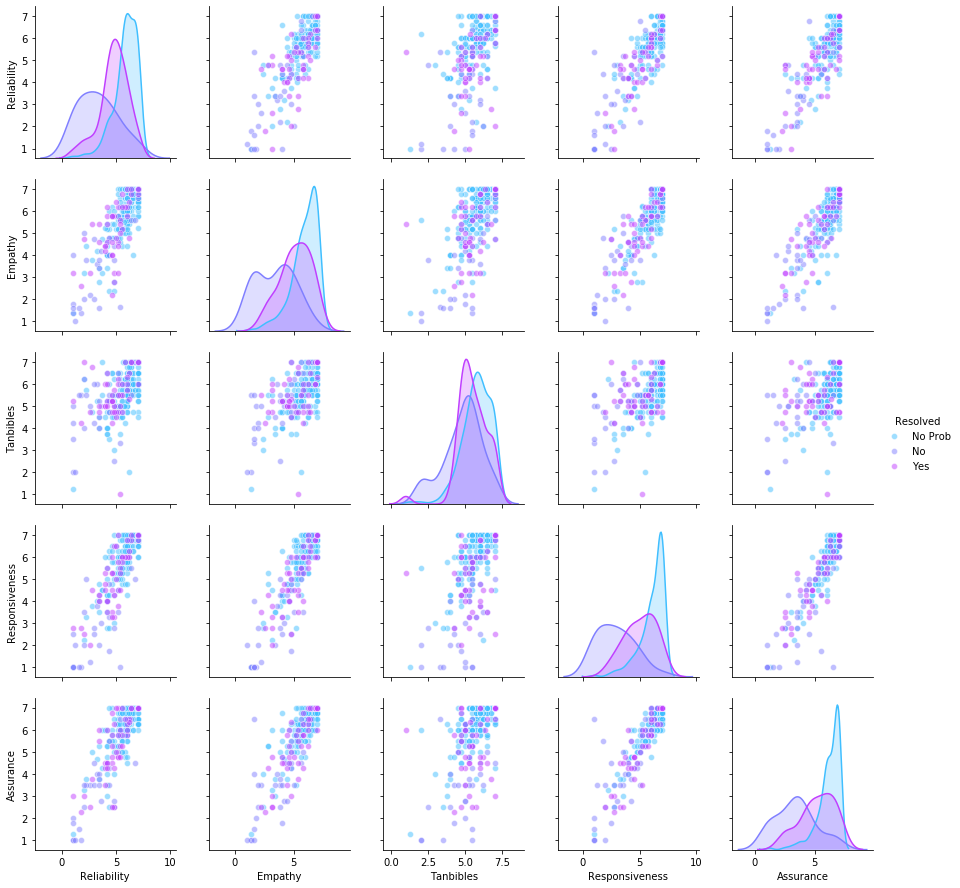

In [13]:
# Setting the color aesthetic for the plot
sns.set_palette("cool", 3)

# Make the correlogram matrix
# Note: we are dropping the rows that contain NaN to prevent Seaborn from giving an error message
sns.pairplot(df_b.dropna(how = "any"), hue = "Resolved", plot_kws = {'alpha': 0.5})
plt.show()


The correlogram matrix shows that the five dimensions are positively correlated with each other.

### a. Describe the service perception ratings along the five dimensions. On average, are the dimensions statistically significantly different from one another? (Hint: See T‐test Two Variables)

In [14]:
# Make a smaller dataframe object that only has the columns that we want to test against each other.
# This will be easier to work with
df_c = df[["reliavrg", "empavrg", "tangavrg", "respavrg", "assuravg"]].copy()
#Raname the columns for readability
df_c.columns = ["Reliability", "Empathy", "Tanbibles", "Responsiveness", "Assurance"]

In [15]:
# Create a loop to run a t-test for each pair-wise combination in our dataframe
for combo in combinations(df_c, 2):
    print('\033[1m' + combo[0] + " and " + combo[1] + " t-test" + '\033[0m')
    print(stats.ttest_rel(df_c[combo[0]], df_c[combo[1]], nan_policy='omit'))
    print('\n')

Reliability and Empathy t-test
Ttest_relResult(statistic=-1.97463843456551, pvalue=0.049298632145678034)


Reliability and Tanbibles t-test
Ttest_relResult(statistic=-2.38253561676657, pvalue=0.017886281935661982)


Reliability and Responsiveness t-test
Ttest_relResult(statistic=-3.146849524925573, pvalue=0.0018402988003207313)


Reliability and Assurance t-test
Ttest_relResult(statistic=-6.0262897616548114, pvalue=5.642507208186951e-09)


Empathy and Tanbibles t-test
Ttest_relResult(statistic=-0.9729672339677318, pvalue=0.33143404297202583)


Empathy and Responsiveness t-test
Ttest_relResult(statistic=-1.2132227112564653, pvalue=0.2261249847137439)


Empathy and Assurance t-test
Ttest_relResult(statistic=-4.127359719338734, pvalue=4.919216794881645e-05)


Tanbibles and Responsiveness t-test
Ttest_relResult(statistic=0.47555946127326276, pvalue=0.6347815111518086)


Tanbibles and Assurance t-test
Ttest_relResult(statistic=-1.4500652651467716, pvalue=0.1482228202155558)


Responsiveness

We cannot reject the nulls that Empathy and Tangibles are the same, Empathy and Responsiveness are the same, Tangibles and Responsiveness are the same, or Tangibles and Assurance are the same. <br><br>
At the 5% level, we are confident that Reliability and Empathy, Reliability and Tanbibles, Reliability and Responsiveness, Reliability and Assurance, Empathy and Assurance, and Responsiveness and Assurance are all statistically different.


### b. Describe the order of importance of those service dimensions as indicated by the self‐reported importance measures. (For a useful graph try a bar plot and order the dimensions in descending order)

In [16]:
df_d = df[["tanimp","relimp","resimp","asrimp","empimp"]].copy()
df_d.columns = ["Tangibles Importance","Reliability Importance","Responsiveness Importance","Assurance Importance","Empathy Importance"]
# Drop the NaN rows to make a graph
df_d = df_d.dropna(how = "any")
# Side note: Should we drop those rows? Do we think the missing information is random or correlated, in which case dropping will introduce bias?

# create a df with the mean scores, sorting in descending order
df_d = df_d.mean().sort_values(ascending = False)
df_d

Reliability Importance       28.814229
Responsiveness Importance    22.695652
Assurance Importance         19.849802
Empathy Importance           17.545455
Tangibles Importance         11.086957
dtype: float64

Note we have 253 rows as opposed to the 285 we began with.

In [17]:
# create our x values, i.e., the dimensions of service
# Note from the above ouput that these are the index values of our rows
dimensions = df_d.index
# create y values, which is the 
avg_score = df_d[:]


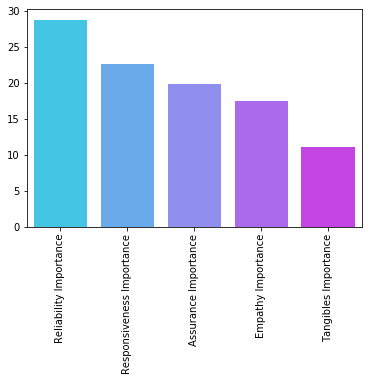

In [18]:
sns.set_palette("cool", 5)
bar_plt = sns.barplot(x=dimensions, y=avg_score)
bar_plt = bar_plt.set_xticklabels(bar_plt.get_xticklabels(), rotation=90)
# I CANT FUCKING FIGURE OUT HOW TO GET A TITLE ON THIS PLOT

The graph above shows the five dimensions of service, ranked in descending order by the self-reported importance scores collected by the survey. In order: Reliability, Responsiveness, Assurance, Empathy, Tangibles.

## 3. Do overall service‐quality perceptions (oq) differ between the genders?
### a. Compare the mean ratings for the two segments based on gender and report the relationship. Use the appropriate statistical test (Hint: See T‐test Variable Split).

In [33]:
df_e = df[["oq", "sex"]].copy()
df_e.columns = ["Overall Quality", "Sex"]
df_e = df_e.dropna()
means = df_e.groupby("Sex").mean()
means

,Overall Quality
Sex,
Female,7.825397
Male,7.868613


In [39]:
len(df_e)


263

Men and women both have very similar average ratings for Overall Quality. Is the slight difference statistically significant? Let us run the t-test at the 5% level.

In [37]:
# Separating the data into two dataframe by gender to make our statistical analysis easier
df_e_male = df_e[df_e["Sex"] == "Male"]
df_e_female = df_e[df_e["Sex"] == "Female"]
#Dropping the "sex" column before running the t-test
df_e_male = df_e_male.iloc[:,0]
df_e_female = df_e_female.iloc[:,0]

In [38]:
# t-test of independent samples
results = pd.DataFrame(stats.ttest_ind(df_e_male, df_e_female))
results.columns = ["Overall Quality"]
results.index = ["t-test", "p-value"]
results

,Overall Quality
t-test,0.153617
p-value,0.878031


There is not a statistically significant relationship between gender and overall-quality perceptions at the 5% level for any of the dimensions of service-quality.

### 4. Do overall service quality perceptions differ between those who had a problem and those who did not? (Hint: See Chisquare Test of Association) What about between those who had a problem and had it resolved versus those who had a problem and never had it resolved? (Hint: As before but filter the PivotTable carefully).

In [22]:
df_e = df[["oq", "prob"]].copy()
df_e.columns = ["Overall Quality", "Problem"]
df_e = df_e.dropna()
means = df_e.groupby("Problem").mean()
means

,Overall Quality
Problem,
No,8.659091
Yes,5.670886


The average Overall Quality rating for users who have reported a problem is lower than that of the subset of customers who have not. <br>

I think goodness of fit is related to comparing wheter categorical variables are related? For this don't we want a t-test of independence?

In [23]:
df_prob = df_e[df_e["Problem"] == "Yes"]
df_noprob = df_e[df_e["Problem"]=="No"]
# len(df_prob) + len(df_noprob)

In [24]:
# Do the t-test
results = pd.DataFrame(stats.ttest_ind(df_prob["Overall Quality"], df_noprob["Overall Quality"]), index = ['T-test', 'p-value'], columns = ['Prob vs No Prob'])
results



,Prob vs No Prob
T-test,-1.152745e+01
p-value,5.451233e-25


Look at that low p-value! We reject the null. "Problem" is statistically significant!<br><br>
Now let us examine the customers who had problems and segment them by resolved or not resolved.

In [25]:
# Create a df of two columns with OQ and Revolve
df_resolved = df.loc[:,['oq', 'resolve']]
df_resolved.columns = ['Overall Quality', 'Resolved']
df_resolved.groupby('Resolved').mean()

,Overall Quality
Resolved,
No,4.00000
Yes,6.76087


In [26]:
# Create df of only resolved customers
df_res = df_resolved[df_resolved['Resolved'] == "Yes"].dropna()
# Create df of only unresolved customers
df_nores = df_resolved[df_resolved['Resolved'] == "No"]

In [27]:
# T-Test time
Resolved = pd.DataFrame(stats.ttest_ind(df_res['Overall Quality'], df_nores['Overall Quality']), index = ['T-stat', 'p-value'], columns = ['Resolved vs Not Resolved'])
Resolved

,Resolved vs Not Resolved
T-stat,4.878359
p-value,0.000006


We reject the null!